In [52]:
import numpy as np
%cd ..
from src import graph_building

/


In [53]:
data = np.array([[3,-1],
                 [4,0],
                 [5,-2],
                 [4,6],
                 [5,7],
                 [5.5,6]])

In [54]:
dist = graph_building.distances(data)
# dist

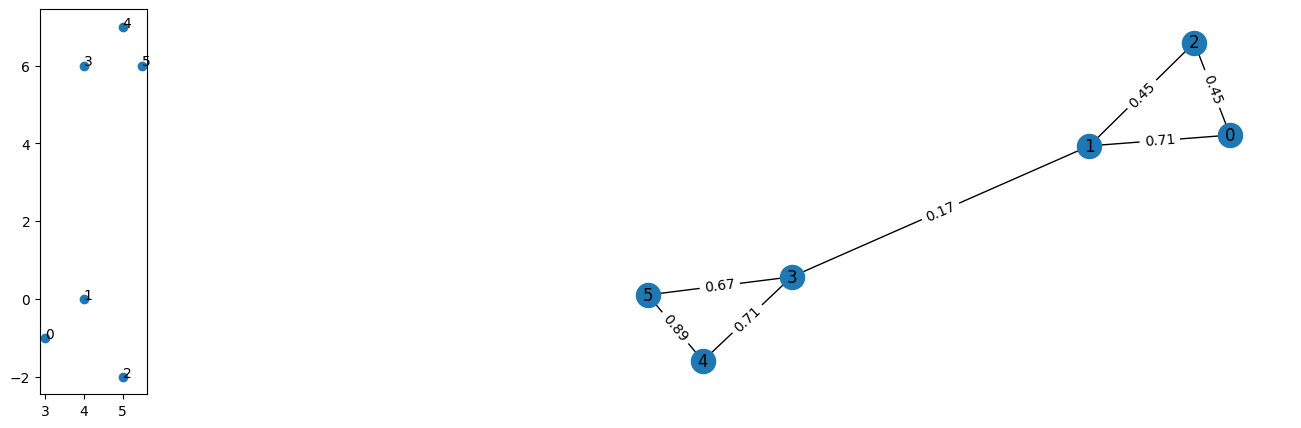

In [77]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 5]

import networkx as nx

aspect = 'equal'
# aspect = 'auto'

# draw datapoints
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_aspect(aspect, adjustable='box')
ax1.scatter(data[:, 0], data[:, 1])
for i in range(data.shape[0]):
    ax1.annotate(i, (data[i, 0], data[i, 1]))

graph = graph_building.build_graph(dist)

layout = nx.spring_layout(graph)

nx.draw(graph, pos=layout, ax=ax2, with_labels=True)
labels = dict((key, round(val, ndigits=2)) for key, val in nx.get_edge_attributes(graph, 'weight').items())
_ = nx.draw_networkx_edge_labels(graph, pos=layout, ax=ax2, edge_labels=labels)

In [78]:
import networkx as nx
from node2vec import Node2Vec
node2vec_seed = 0


In [66]:
node2vec = Node2Vec(graph, dimensions=2, walk_length=10, num_walks=100, workers=1)

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 2020.83it/s]


In [67]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

In [68]:
keys = sorted(w for w in model.wv.key_to_index)
embeddings = np.vstack(model.wv[keys])
embeddings

array([[ 1.0471772 ,  1.324609  ],
       [ 0.83090484,  1.0330826 ],
       [ 1.157626  ,  0.8986141 ],
       [-0.27115375,  0.8760283 ],
       [-0.2448867 ,  0.94631696],
       [-0.03245557,  1.058498  ]], dtype=float32)

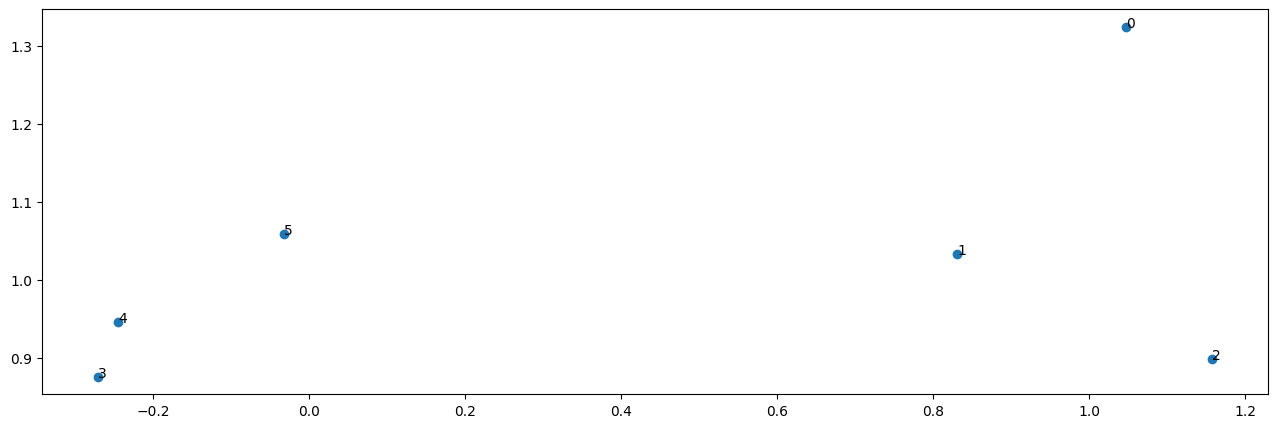

In [79]:
fig, ax = plt.subplots()
x = embeddings[:,0]
y = embeddings[:,1]

ax.scatter(x,y)
ax.set_aspect(aspect, adjustable='box')

for idx, key in enumerate(keys):
    ax.annotate(key, (embeddings[idx, 0], embeddings[idx, 1]))